In [1]:
# for colab
%pip install pgmpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import CausalInference

import networkx as nx
import matplotlib.pyplot as plt

# Manufacturing Bayes
From [Codes for Unit 3](https://www2.isye.gatech.edu/isye6420/supporting.html).

Associated lecture video: [Unit 3 Lesson 5](https://www.youtube.com/watch?v=kpd-e-7K6vQ&list=PLv0FeK5oXK4l-RdT6DWJj0_upJOG2WKNO&index=13).

Three types of machines produce items. The first type makes 30% of the items, the second 50%, and the third 20%.
The probability of an item conforming to standards is 0.94 if it comes from a type-1 machine, 0.95 from a type-2 machine, and 0.97 from a type-3 machine.

An item from the production is selected at random.

1. What is the probability that it was conforming?

2. If it was found that the item is conforming, what is the probability that it was produced on a type-1 machine?


The code below uses pgmpy. Jacob Harris, a student in the Fall 2021 class, also managed to get this [working in PyMC3](https://github.gatech.edu/jharris373/isye6420_examples/blob/master/lecture/unit_3/manufacturing_bayes/PyMC3/simple%20bayes%20net%20example%20-%20manufacturing%20bayes.ipynb).

In [3]:
#Defining network structure
mb_model = BayesianNetwork([('Machine', 'Conforming')])

#Defining the parameters
cpd_machine = TabularCPD(variable='Machine', 
                          variable_card=3,
                          values=[[.3], [0.5], [.2]])

cpd_conforming = TabularCPD(variable='Conforming', variable_card=2,
                       values=[[0.06, 0.05, 0.03],
                               [0.94, 0.95, 0.97]],
                       evidence=['Machine'],
                       evidence_card=[3])

# Associating the parameters with the model structure
mb_model.add_cpds(cpd_machine, cpd_conforming)

assert mb_model.check_model(), "Your model doesn't make sense to pgmpy."

print(f"Nodes: {mb_model.nodes()}")
print(f"Edges: {mb_model.edges()}")

Nodes: ['Machine', 'Conforming']
Edges: [('Machine', 'Conforming')]


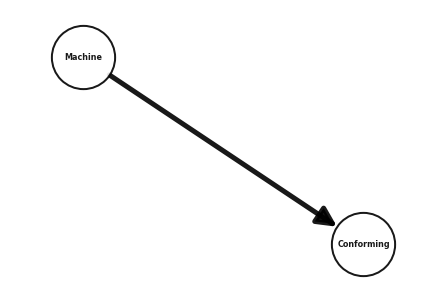

In [4]:
options = {
    'arrowsize': 40,
    'font_size': 8,
    'font_weight': 'bold',
    'node_size': 4000,
    'node_color': 'white',
    'edgecolors': 'black',
    'linewidths': 2,
    'width': 5,
    'alpha': .9
}

# plot the network
nx.draw(mb_model, with_labels=True, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis('off')
plt.show()

Make sure the above visualization makes sense!

See [Networkx docs](https://networkx.org/documentation/latest/auto_examples/basic/plot_simple_graph.html#sphx-glr-auto-examples-basic-plot-simple-graph-py) for more details on plotting.

In [5]:
mb_infer = CausalInference(mb_model)

# probability a random item is conforming
q = mb_infer.query(variables=['Conforming'])
print("P(C):")
print(q)

# probability a conforming item came from the different machine types
q = mb_infer.query(variables=['Machine'], evidence={'Conforming': True})
print("P(M|C) (0-indexed, so Machine 1 is listed as Machine(0) and so on):")
print(q)


P(C):
+---------------+-------------------+
| Conforming    |   phi(Conforming) |
+===============+===================+
| Conforming(0) |            0.0490 |
+---------------+-------------------+
| Conforming(1) |            0.9510 |
+---------------+-------------------+
P(M|C) (0-indexed, so Machine 1 is listed as Machine(0) and so on):
+------------+----------------+
| Machine    |   phi(Machine) |
+============+================+
| Machine(0) |         0.2965 |
+------------+----------------+
| Machine(1) |         0.4995 |
+------------+----------------+
| Machine(2) |         0.2040 |
+------------+----------------+


Note that this doesn't exactly match the BUGS results in U3L5, because BUGS is sampling from random variables rather than performing exact calculations.